# Importing Major Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data file

In [2]:
data=pd.read_csv('all_months_data.csv')

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.shape

(186850, 6)

# Checking for null values and duplicates

In [5]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


# Dropping those null values and duplicates

In [7]:
data.dropna(how='all', inplace=True)
data.drop_duplicates(inplace=True)
data= data.reset_index(drop=True)

In [8]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Add month column

In [9]:
data['month']= data['Order Date'].str[0:2]

In [10]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


# While performing EDA, i found that there were some rows with same entries as column names, so those have to be removed

In [11]:
data[data['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [12]:
data.drop(data[data['Order Date'].str[0:2]=='Or'].index, inplace=True)

In [13]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [14]:
data['month'].astype('int32')

0         4
1         4
2         4
3         4
4         4
         ..
185682    9
185683    9
185684    9
185685    9
185686    9
Name: month, Length: 185686, dtype: int32

In [15]:
data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

# Calculating sales for each order

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
data['Quantity Ordered']= pd.to_numeric(data['Quantity Ordered'])

In [18]:
data['Price Each']=pd.to_numeric(data['Price Each'])

In [19]:
#Creating sales column

data['sales']=data['Quantity Ordered'] * data['Price Each']

In [20]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


# Which month had best sales?

In [21]:
monthlysales= data.groupby('month').sum()['sales']
monthlysales

month
01    1821413.16
02    2200078.08
03    2804973.35
04    3389217.98
05    3150616.23
06    2576280.15
07    2646461.32
08    2241083.37
09    2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

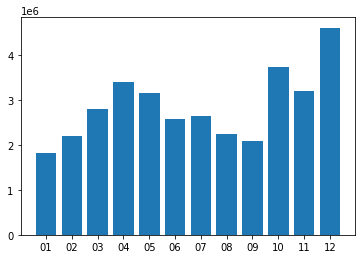

In [22]:
plt.bar(monthlysales.index,height=monthlysales)
plt.show

## December had the highest sales maybe because of Christmas gifting

# From which city we had highest sales?

In [23]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [24]:
# Extracting city from the address

data['city']= data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [26]:
data['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [27]:
# Extracting state (with code) from the address

data['state']= data['Purchase Address'].apply(lambda x: x.split(',')[2])

In [28]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA 02215
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001


In [29]:
# Extracting state from state (with code)

data['state1']= data['state'].apply(lambda x: x.split(' ')[1])

In [30]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,state1
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX 75001,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA 02215,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA 90001,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA


In [31]:
# Combining City and State

data['area']=data['city'] + ' (' + data['state1'] + ')'

In [32]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,state1,area
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX 75001,TX,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA 02215,MA,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA 90001,CA,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA,Los Angeles (CA)


In [33]:
data['area'].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

In [34]:
# Because we have extracted area, so dropping all other unnecessary columns

data=data.drop(columns=['state','state1','city'])

In [35]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,area
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [36]:
data= data.rename(columns={'area':'city'})

In [37]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA)
185683,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
185684,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA)


In [38]:
citysales=data.groupby('city').sum()

In [39]:
citysales

,Quantity Ordered,Price Each,sales
city,,,
Atlanta (GA),16584,2778608.69,2794199.07
Austin (TX),11137,1808340.03,1818044.33
Boston (MA),22494,3634398.40,3658627.65
Dallas (TX),16707,2750026.38,2765373.96
Los Angeles (CA),33247,5417171.70,5448304.28
New York City (NY),27903,4632920.54,4661867.14
Portland (ME),2746,446752.36,449321.38
Portland (OR),11291,1859836.44,1870010.56
San Francisco (CA),50169,8204001.38,8254743.55


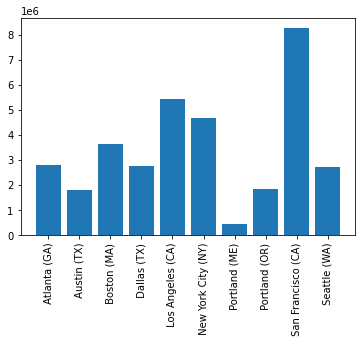

In [40]:
plt.bar(citysales.index,height=citysales['sales'])
plt.xticks(citysales.index,rotation='vertical')
plt.show()

## San Francisco gave us the highest sales among all other cities

# What time to show ads?

In [41]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   month             185686 non-null  object 
 7   sales             185686 non-null  float64
 8   city              185686 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.2+ MB


In [43]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [44]:
data['order hour']=data['Order Date'].dt.hour
data['order minute']=data['Order Date'].dt.minute

In [45]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,order hour,order minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA),20,56
185683,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA),16,0
185684,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA),7,39
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA),17,30


In [46]:
# Only hourly data is considered

hourlydata= data.groupby('order hour').count()
hourlydata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,order minute
order hour,,,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252


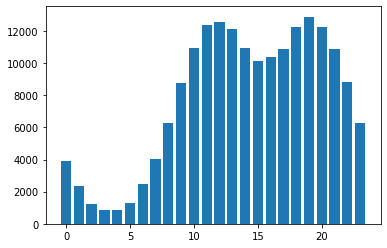

In [47]:
plt.bar(hourlydata.index,hourlydata['Order ID'])
plt.show()

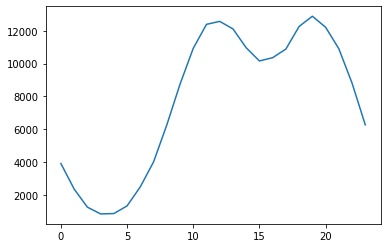

In [48]:
plt.plot(hourlydata.index,hourlydata['Order ID'])
plt.show()

## It clearly shows that there is high inflow of orders at around 11:00 hr and 18:00/19:00 hr

# Which products were sold together?

In [49]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,order hour,order minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


In [50]:
data1 = data[data.duplicated('Order ID',keep=False)]
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,order hour,order minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco (CA),17,0
...,...,...,...,...,...,...,...,...,...,...,...
185630,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta (GA),20,18
185641,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta (GA),0,25
185642,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta (GA),0,25
185678,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco (CA),13,49


In [51]:
# Extracting items in same order into a list

data2 = data1.groupby('Order ID')['Product'].apply(lambda x: ','.join(x))

In [52]:
data2

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 6879, dtype: object

In [53]:
data2= pd.DataFrame({'Order ID':data2.index,'items':data2.values})

In [54]:
data2

,Order ID,items
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [55]:
data1 = data1.merge(data2,how='left',on='Order ID')

In [56]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,order hour,order minute,items
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [57]:
data1[['Order ID','items']].drop_duplicates()['items'].value_counts()

iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: items, Length: 350, dtype: int64

## These items were sold together mostly

# Which product was sold the most?

In [58]:
data.groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Price Each,sales,order hour,order minute
Product,,,,,
AAA Batteries (4-pack),30986,61629.88,92648.14,296904,611350
AA Batteries (4-pack),27615,78942.72,106041.60,298077,608560
USB-C Charging Cable,23931,261215.05,285975.45,313980,646428
Lightning Charging Cable,23169,323069.50,346376.55,311815,632915
Wired Headphones,20524,225999.51,246082.76,271245,552928
Apple Airpods Headphones,15637,2328750.00,2345550.00,222938,454935
Bose SoundSport Headphones,13430,1329667.02,1342865.70,192077,391667
27in FHD Monitor,7541,1124625.02,1131074.59,107422,219659
iPhone,6847,4788000.00,4792900.00,98617,201604


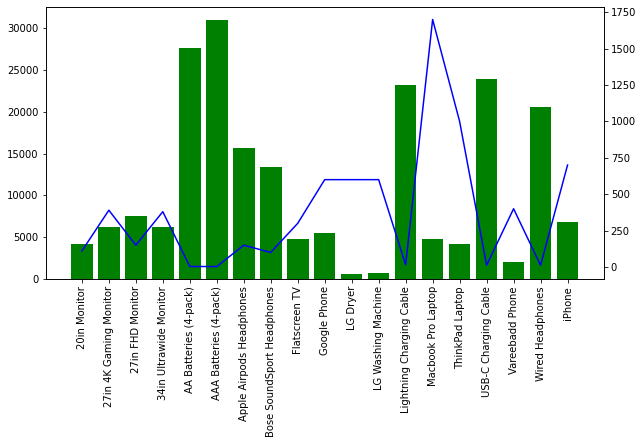

In [59]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax.bar(data.groupby('Product').sum().index,data.groupby('Product').sum()['Quantity Ordered'], color = 'g')
ax2.plot(data.groupby('Product').sum().index,data.groupby('Product').mean()['Price Each'], color = 'b')
plt.show()

## Bar shows the product quantity sold and the line shows that item's average order price